In [1]:
import argparse
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from utils import *
from classifiers import *
from preprocess import  preprocess
import matplotlib.pyplot as plt
import math

In [14]:

def plot_F_Scores(y_test, y_predict):
    '''
    Task: Compute the F1 score of a set of predictions given
          its reference

    Input: y_test: Reference labels 
           y_predict: Predicted labels

    Output: Print F1 score
    '''
    f1_micro = f1_score(y_test, y_predict, average='micro')
    f1_macro = f1_score(y_test, y_predict, average='macro')
    f1_weighted = f1_score(y_test, y_predict, average='weighted')
    print("F1: {} (micro), {} (macro), {} (weighted)".format(f1_micro, f1_macro, f1_weighted))
    return f1_weighted

In [5]:
values_unigrams_word = {}

In [30]:
for i in values_unigrams_word:
    print(values_unigrams_word[i]['max_features'])

500
1000
2000
4000
6000
8000


In [43]:
analyzer = 'word'
max_features = 8000
n_components = 150
num = '12'

seed = 42
random.seed(seed)
raw = pd.read_csv('C:/Users/jordi/Documents/GitHub/MUD_Labs_Git/LangDetect/data/dataset.csv')
languages = set(raw['language']) 

# Split Train and Test sets
X=raw['Text']
y=raw['language']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


# Vectorize the text
unigramVectorizer = CountVectorizer(analyzer=analyzer, ngram_range=(1,1) , max_features=max_features)
X_unigram_train_raw = unigramVectorizer.fit_transform(X_train)
X_unigram_test_raw = unigramVectorizer.transform(X_test)
unigramFeatures = unigramVectorizer.get_feature_names()
print('length of the vector:' + str(len(unigramFeatures)))

# change variables names
features = unigramFeatures     
X_train_raw = X_unigram_train_raw
X_test_raw = X_unigram_test_raw

X_train, X_test = normalizeData(X_train_raw, X_test_raw)

#Apply Classifier  
y_predict = applyNaiveBayes(X_train, y_train, X_test)
print('NO PCA Prediction Results:')     # NO PCA to compare results
f1_nopca = plot_F_Scores(y_test, y_predict)

pca = PCA(n_components=n_components)
pca.fit(toNumpyArray(X_train))
pca_test = pca.transform(toNumpyArray(X_test))
pca_train = pca.transform(toNumpyArray(X_train))

print('Variance explained by PCA:', sum(pca.explained_variance_ratio_))

X_train, X_test = normalizeData(pca_train, pca_test)
clf = MultinomialNB()
clf.fit(X_train + 1, y_train) # +1 to avoid 0 values
y_predict = clf.predict(X_test + 1)

print('========')
print('Prediction Results:')    
plot_F_Scores(y_test, y_predict)
print('========')

values_unigrams_word[num] = {}
values_unigrams_word[num]['max_features'] = max_features
values_unigrams_word[num]['n_components'] = n_components
values_unigrams_word[num]['score'] = clf.score(X_test + 1, y_test)
values_unigrams_word[num]['variance_explained'] = sum(pca.explained_variance_ratio_)

c:\Users\jordi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


length of the vector:8000
NO PCA Prediction Results:
F1: 0.915 (micro), 0.9070115682835774 (macro), 0.9096251740798893 (weighted)
Variance explained by PCA: 0.4801025784779381
Prediction Results:
F1: 0.9172727272727272 (micro), 0.9171421719160524 (macro), 0.9180309164311055 (weighted)


In [44]:

values_unigrams_word[num] = {}
values_unigrams_word[num]['max_features'] = max_features
values_unigrams_word[num]['n_components'] = n_components
values_unigrams_word[num]['no_pca_score'] = f1_nopca
values_unigrams_word[num]['score'] = clf.score(X_test + 1, y_test)
values_unigrams_word[num]['variance_explained'] = sum(pca.explained_variance_ratio_)
values_unigrams_word[num]

{'max_features': 8000,
 'n_components': 150,
 'no_pca_score': 0.9096251740798893,
 'score': 0.9172727272727272,
 'variance_explained': 0.4801025784779381}

In [45]:
values_unigrams_word

{'1': {'max_features': 500,
  'n_components': 75,
  'no_pca_score': 0.8556316226612983,
  'score': 0.8770454545454546,
  'variance_explained': 0.6901511466315684},
 '2': {'max_features': 1000,
  'n_components': 75,
  'no_pca_score': 0.8845797399266582,
  'score': 0.8872727272727273,
  'variance_explained': 0.5899301547810706},
 '3': {'max_features': 2000,
  'n_components': 75,
  'no_pca_score': 0.89824330473188,
  'score': 0.9013636363636364,
  'variance_explained': 0.520138203896148},
 '4': {'max_features': 4000,
  'n_components': 75,
  'no_pca_score': 0.9049876170599344,
  'score': 0.9095454545454545,
  'variance_explained': 0.45762340088664716},
 '5': {'max_features': 6000,
  'n_components': 75,
  'no_pca_score': 0.9077363368411433,
  'score': 0.9122727272727272,
  'variance_explained': 0.4256003004291751},
 '6': {'max_features': 8000,
  'n_components': 75,
  'no_pca_score': 0.9096251740798893,
  'score': 0.9115909090909091,
  'variance_explained': 0.4060928666978051},
 '7': {'max_f

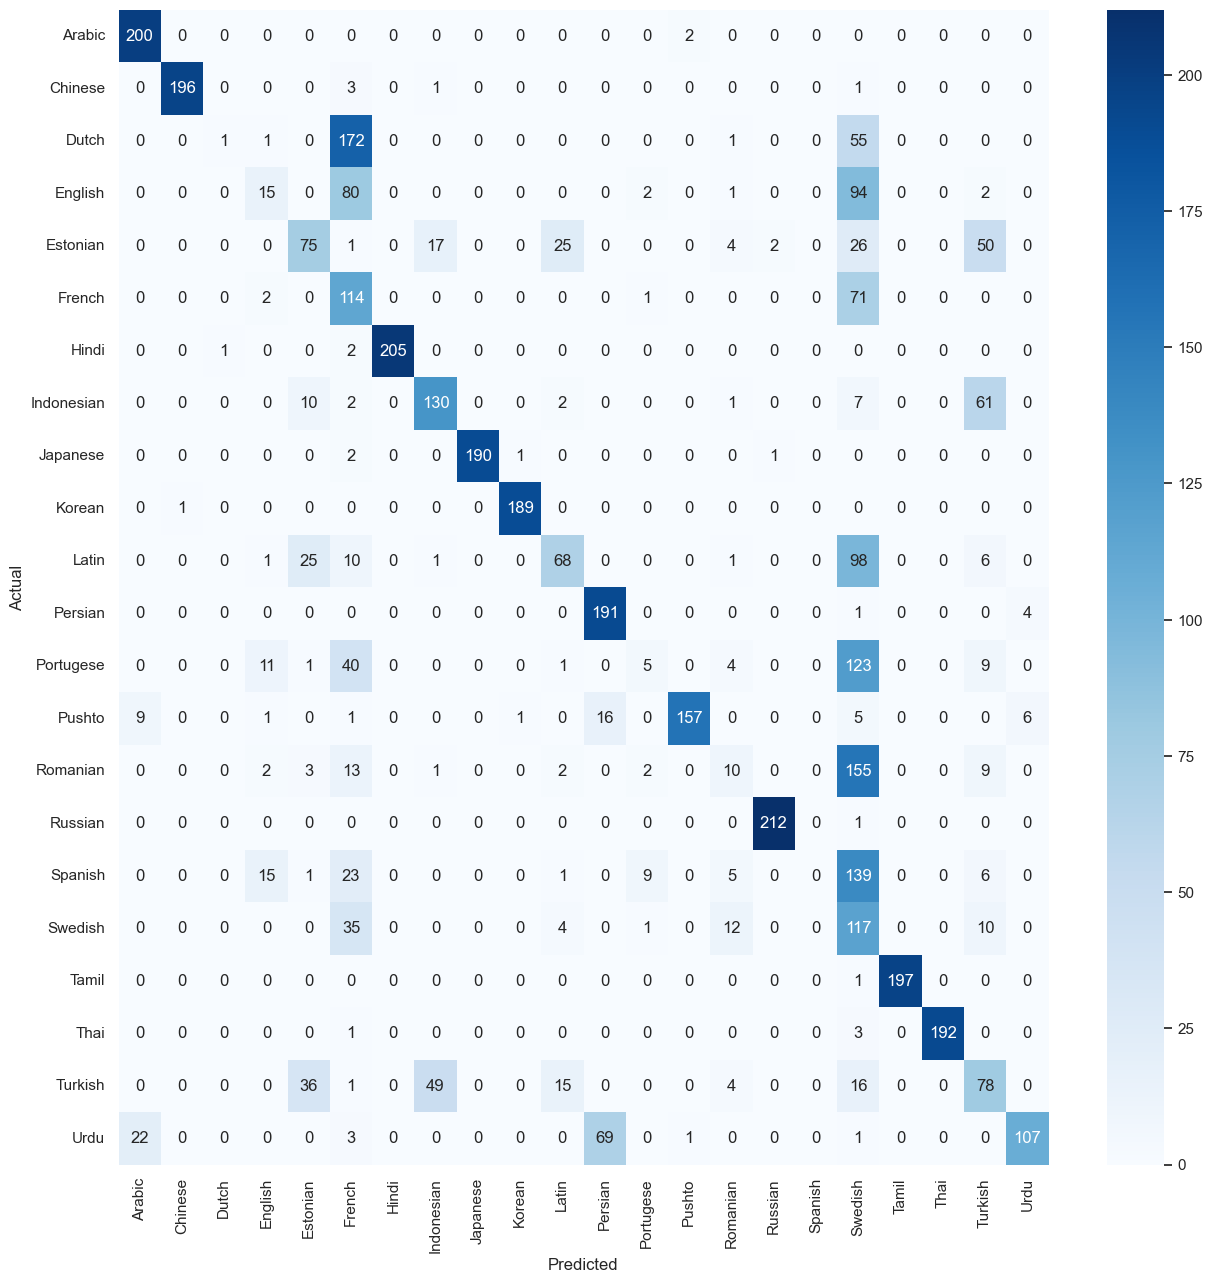

In [22]:
# plot confusion matrix
plot_Confusion_Matrix(y_test, y_predict, "Blues") 